In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninadaithal/imagesoasis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imagesoasis


In [3]:
data_dir = (path + "/Data")

class_names = os.listdir(data_dir)
print("Classes:", class_names)


Classes: ['Non Demented', 'Very mild Dementia', 'Moderate Dementia', 'Mild Dementia']


In [4]:
total_images = 0
image_shapes = []


for cls in class_names:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    num_images = len(images)
    total_images += num_images

    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensures 3 channels
            image_shapes.append(np.array(img).shape)
        except:
            continue

    print(f"{cls}: {num_images} images")

# Convert to array for easy stats
image_shapes = np.array(image_shapes)

print(f"Total Images: {total_images}")

Non Demented: 67222 images
Very mild Dementia: 13725 images
Moderate Dementia: 488 images
Mild Dementia: 5002 images
Total Images: 86437


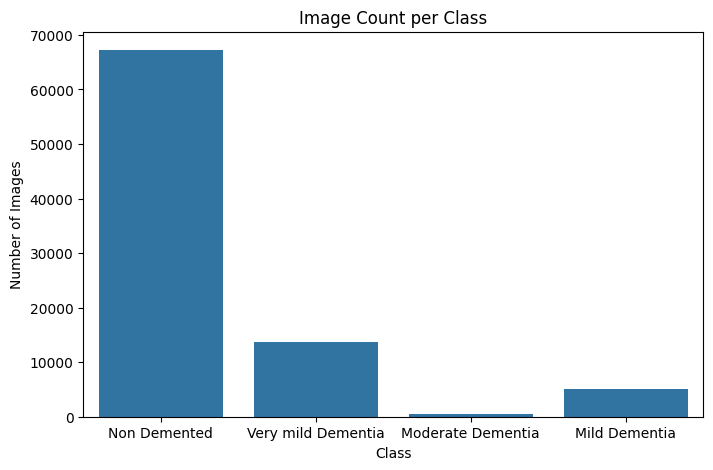

In [5]:
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [6]:
image_shapes = np.array(image_shapes)
image_shapes

array([[248, 496,   3],
       [248, 496,   3],
       [248, 496,   3],
       ...,
       [248, 496,   3],
       [248, 496,   3],
       [248, 496,   3]])

In [7]:
heights = image_shapes[:, 0]
widths = image_shapes[:, 1]
channels = image_shapes[:, 2]

print(f"Image Height - Mean: {np.mean(heights):.1f}, Min: {np.min(heights)}, Max: {np.max(heights)}")
print(f"Image Width  - Mean: {np.mean(widths):.1f}, Min: {np.min(widths)}, Max: {np.max(widths)}")
print(f"Channels: {np.unique(channels)}")

Image Height - Mean: 248.0, Min: 248, Max: 248
Image Width  - Mean: 496.0, Min: 496, Max: 496
Channels: [3]


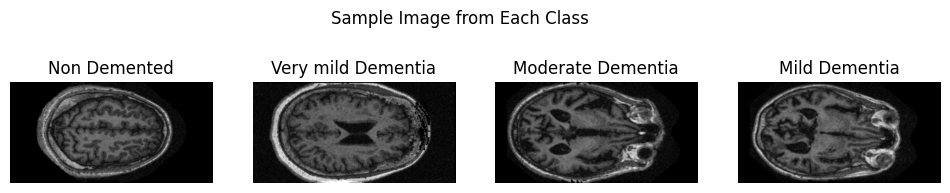

In [9]:
plt.figure(figsize=(12, 6))
for i, cls in enumerate(class_names):
    img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])
    img = Image.open(img_path)
    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.suptitle("Sample Image from Each Class",  y=0.7)
plt.show()


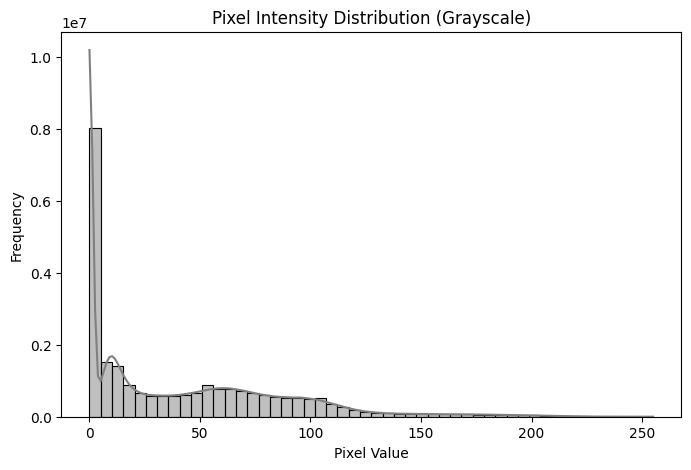

In [10]:
pixel_values = []

for cls in class_names:
    class_path = os.path.join(data_dir, cls)
    for file in os.listdir(class_path)[:50]:  # sample 50 images per class
        try:
            img = Image.open(os.path.join(class_path, file)).convert('L')  # Convert to grayscale
            pixel_values.extend(np.array(img).flatten())
        except:
            continue

plt.figure(figsize=(8, 5))
sns.histplot(pixel_values, bins=50, kde=True, color='gray')
plt.title("Pixel Intensity Distribution (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [11]:
from hashlib import md5

hashes = set()
duplicates = []
corrupted = []

for cls in class_names:
    class_path = os.path.join(data_dir, cls)
    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = md5(f.read()).hexdigest()
            if file_hash in hashes:
                duplicates.append(img_path)
            else:
                hashes.add(file_hash)
        except:
            corrupted.append(img_path)

print(f"Found {len(duplicates)} duplicate images")
print(f"Found {len(corrupted)} corrupted images")


Found 0 duplicate images
Found 0 corrupted images
